-------------------------------------------------

This notebook is part of the [q4p (Quantum Computing for Programmers) series](https://github.com/CarloLepelaars/q4p). The original notebook can be found on [Github](https://github.com/CarloLepelaars/q4p/blob/main/basics_nbs/complex.ipynb).

-------------------------------------------------

# Introduction to complex numbers

This notebook gives you a primer on complex numbers, which are an essential part of quantum computing. Even if you are already familiar with them, this can still serve as a good refresher before diving into the [q4p](https://carlo.ai/q4p) course.

## Complex number representations

Complex numbers are numbers with two components: a real part $x$ and an imaginary part $y$. We can visually represent this as a point on a (unit) circle.

# <img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/ImaginaryUnit5.svg" style="background-color: white; display: block; margin-left: auto; margin-right: auto; width: 40%;">

The structure of a complex number ($\mathbb{C}$) is $z = x + yi$, where $x$ and $y$ are real numbers ($x,y \in \mathbb{R}$), and $i^2 = -1$. 

In Python we can use the built-in `complex` type to create a complex number. For example, below we create the complex number $2 + 2i$. In Python and most of engineering $j$ is used instead of $i$. Be aware that $i$ and $j$ refer to the same imaginary number.

A definition of $i$ you will often see is $\sqrt{-1} = i$. This property allows us to take the square root of negative numbers, which is convenient as it extends our number system to handle calculations that would otherwise be undefined. For example, equations like $x^2 = -1$ can now be solved. Quantum states and transformations are defined using complex numbers, so it is important to understand how they work. Below we will analyze the properties of complex numbers in-depth.


In [1]:
# NumPy for representing vectors and matrices
import numpy as np
# Matplotlib for visualization
import matplotlib.pyplot as plt

In [2]:
# Complex number as a standard type in Python
z = complex(2 + 1j)

If we add a `j` to the number, Python will automatically create a complex number.

In [3]:
py_complex_number = 2 + 1j
py_complex_number

(2+1j)

From this Python object we can select the real and imaginary parts.

In [4]:
py_complex_number.real, py_complex_number.imag

(2.0, 1.0)

In the [q4p](https://carlo.ai/q4p) course we will mainly use [NumPy](https://numpy.org) to create complex numbers, vectors and matrices. The standard NumPy type for complex numbers is `numpy.complex128`.

In [5]:
numpy_complex_number = np.complex128(2 + 1j)

NumPy has more operations to transform complex numbers. It also allows us to create complex vectors and matrices.

In [6]:
numpy_complex_number.real, numpy_complex_number.imag

(2.0, 1.0)

A complex number can be viewed as a vector in 2 dimensions. This intuition will be very helpful when we start working with quantum states. Below you can see that $2+1i$ points to $2$ on the X-axis and $1$ on the Y-axis.

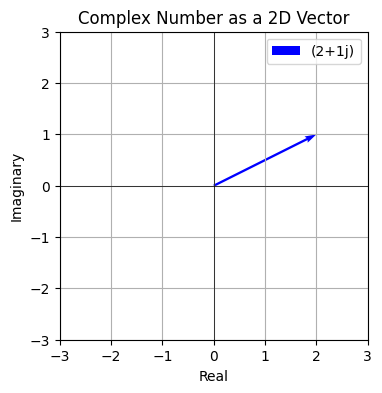

In [7]:
def plot_complex_number(z: complex):
    """Plot complex numbers on 2 dimensions."""
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    plt.quiver(0, 0, z.real, z.imag, angles="xy", scale_units="xy", scale=1, color="blue", label=f"{z}")
    ax.set_aspect("equal")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(y=0, color="k", linestyle="-", linewidth=0.5)
    plt.axvline(x=0, color="k", linestyle="-", linewidth=0.5)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.grid(True)
    plt.legend()
    plt.title("Complex Number as a 2D Vector")


plot_complex_number(2 + 1j)

Creating a vector out of multiple complex numbers adds to the dimensions. In quantum computing we will mainly use vectors to represent **statevectors**.

In [8]:
# Complex vector
np.array([1 + 0j, 0 + 0j])

array([1.+0.j, 0.+0.j])

Complex matrices are used in quantum computing to represent **operators**. 

In [9]:
# Complex matrix
np.array([[0, -1j], [1j, 0]])

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

By definition of the complex numbers, $\sqrt{-1} = i$.

In [10]:
np.sqrt(-1 + 0j)

1j

Make sure that the number is a complex number or you will get a `nan` (not a number) from NumPy.

In [11]:
np.sqrt(-1)

/var/folders/d5/1qd2ftjn7ts_5_k6w2k2g4c00000gn/T/ipykernel_71088/3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan

# Polar form

A complex number can be decomposed as follows using a Polar form:

$$z = a+bi = r cos(\theta) + r sin(\theta) i$$

where $r = |z|$ is the magnitude of the complex number and $\theta = \arctan(\frac{\text{Im}(z)}{\text{Re}(z)})$ is the angle (theta) in radians.



Let's decompose the complex number $2+1j$ into its polar form and verify that the formula is correct.

In [12]:
z = 2 + 1j
z

(2+1j)

$r = |z|$ (absolute value of z)

In [13]:
r = np.abs(z)
r

2.23606797749979

$\theta = arctan(\frac{\text{Im}(z)}{\text{Re}(z)})$. $Im =$ Imaginary part, $Re =$ Real part

In [14]:
theta = np.arctan2(z.imag, z.real)
theta

0.4636476090008061

A simplified way to calculate $arctan(\frac{\text{Im}(z)}{\text{Re}(z)})$ is to use NumPy's `angle` function.

In [15]:
np.angle(z)

0.4636476090008061

We can see that $z = r cos(\theta) + r sin(\theta) i$. `np.allclose` is used to check two values. `np.allclose` is `True` if the values are the same and `False` otherwise.

In [16]:
polar_form = r * np.cos(theta) + r * np.sin(theta) * 1j
polar_form

(2+1j)

In [17]:
np.allclose(z, polar_form)

True

# Exponential form

Another more compact way to represent a complex number is using its exponential form:

$$z = re^{i\theta}$$

Let's also verify that this identity is correct.



In [18]:
z

(2+1j)

We have already calculated $r$ and $\theta$ above. We show that indeed $z = re^{i\theta}$.

In [19]:
exp_form = r * np.exp(1j * theta)
exp_form

(2+1j)

In [20]:
np.allclose(z, exp_form)

True

## Normalized States

In quantum computing we generally only encounter vectors where $r=1$, since quantum states must be normalized. This means that we can simplify our equations to:


$$z = e^{i\theta} = cos(\theta) + i sin(\theta)$$

An example of a normalized state you will encounter in quantum computing is the superposition of two states:

$$z = \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}}i$$

This is the case because $\sqrt{a^2 + b^2} = 1$ with $z = a + bi$:

$$|z| = \sqrt{\left(\frac{1}{\sqrt{2}}\right)^2 + \left(\frac{1}{\sqrt{2}}\right)^2} = \sqrt{\frac{1}{2} + \frac{1}{2}} = \sqrt{1} = 1$$


In [21]:
z = (1 / np.sqrt(2)) + (1 / np.sqrt(2)) * 1j
z

(0.7071067811865475+0.7071067811865475j)

In [22]:
theta = np.angle(z)
theta

0.7853981633974483

First we check that $z = cos(\theta) + i sin(\theta)$ for a normalized state:

In [23]:
norm_polar_form = np.cos(theta) + np.sin(theta) * 1j
norm_polar_form

(0.7071067811865476+0.7071067811865475j)

In [24]:
np.allclose(z, norm_polar_form)

True

Now we check that $z = e^{i\theta}$ for a normalized state:

In [25]:
norm_exp_form = np.exp(1j * theta)
norm_exp_form

(0.7071067811865476+0.7071067811865475j)

In [26]:
np.allclose(z, norm_exp_form)

True

## Complex Conjugate ($*$)

An operation we often encounter in quantum computing is the complex conjugate ($*$). This simply means that the complex part of the number is flipped. With NumPy we can use the `np.conj` function to get the complex conjugate.

$$z = a + bi$$

$$z^* = a - bi$$


In [27]:
z = 3 + 2j
z

(3+2j)

In [28]:
# 3+2j -> 3-2j
np.conj(z)

(3-2j)

For NumPy numbers and arrays we can call `.conj()` directly on the object.

In [29]:
# 3+2j -> 3-2j
np.complex128(z).conj()

(3-2j)

In [30]:
# [1+2j, 3+4j] -> [1-2j, 3-4j]
np.array([1 + 2j, 3 + 4j]).conj()

array([1.-2.j, 3.-4.j])

## Conjugate Transpose ($\dagger$)

Another common quantum computing operation you will encounter is the conjugate transpose ($\dagger$). This is simply an extension of the complex conjugate where we take both the complex conjugate ($*$) and the transpose $^T$. The conjugate transpose is formally denoted by a dagger ($\dagger$) and is sometimes called the "Dagger operation". In quantum mechanics you may also encounter the terms "Hermitian conjugate" or "Hermitian adjoint" for this operation. In NumPy we simply add `.T` to our complex conjugate (`.conj().T`) to get the conjugate transpose.

For vectors the conjugate transpose simplify flips a row vector into a column vector and vice versa. It also flips the sign of the imaginary part ($*$): 
$$v = \begin{bmatrix}
 a_1 & a_2 & \cdots & a_n
\end{bmatrix}$$

$$v^\dagger = \begin{bmatrix}
    a_1^* \\
    a_2^* \\
    \vdots \\
    a_n^*
\end{bmatrix}$$

For matrices the conjugate transpose flips the rows and columns and again flips the sign of the imaginary part ($*$):

$$A = \begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}$$

$$A^\dagger = \begin{bmatrix}
    a_{11}^* & a_{21}^* & \cdots & a_{n1}^* \\
    a_{12}^* & a_{22}^* & \cdots & a_{n2}^* \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{1n}^* & a_{2n}^* & \cdots & a_{nn}^*
\end{bmatrix}$$


In [31]:
vector = np.array([[1 + 2j, 3 + 4j]])
vector

array([[1.+2.j, 3.+4.j]])

In [32]:
# [[1+2j, 3+4j]] -> [[1-2j,
#                    [3-4j]]
vector.conj().T

array([[1.-2.j],
       [3.-4.j]])

In [33]:
matrix = np.array([[1 + 2j, 3 + 4j], [5 + 6j, 7 + 8j]])
matrix

array([[1.+2.j, 3.+4.j],
       [5.+6.j, 7.+8.j]])

In [34]:
# [[1+2j, 3+4j] -> [[1-2j, 5-6j]
#  [5+6j, 7+8j]]    [3-4j, 7-8j]]
matrix.conj().T

array([[1.-2.j, 5.-6.j],
       [3.-4.j, 7.-8.j]])

That is the core of what you should know about complex numbers to get started with quantum computing! For additional video instruction I would recommend the following videos:
- [Quantum Computing Course: 0.1 Introduction to Imaginary and Complex Numbers](https://www.youtube.com/watch?v=8J-H7gbDCos)
- [Quantum Computing Course: 0.2 Complex Numbers on the Number Plane](https://www.youtube.com/watch?v=F7vHr7blzJ4)
- [Imaginary numbers aren't imaginary](https://www.youtube.com/watch?v=pfIGMWxjFTQ)
- [Complex numbers aren't complex](https://www.youtube.com/watch?v=ho3UPqCnzLQ)
- [The Square Root of Negative One](https://www.youtube.com/watch?v=lFT2hwsCMls)
- [Complex Numbers in Quantum Mechanics](https://www.youtube.com/watch?v=qtIsYbYdzCI)

Continue with the q4p course:
- [On Github](https://github.com/CarloLepelaars/q4p/blob/main/nbs/00b-marbles.ipynb)
- [On Kaggle](https://www.kaggle.com/code/carlolepelaars/q4p-00b-marbles-high-level-overview)

**If you are viewing this notebook on Kaggle, consider giving an upvote and leaving a comment. Your feedback is very welcome and I will try to implement your suggestions in this notebook.**

**If you are viewing this notebook on Github, please consider giving a star to the repository.**

-------------------------------------------------

This notebook is part of the [q4p (Quantum Computing for Programmers) series](https://github.com/CarloLepelaars/q4p). The original notebook can be found on [Github](https://github.com/CarloLepelaars/q4p/blob/main/basics_nbs/complex.ipynb).

-------------------------------------------------